In [13]:
import numpy as np
import pandas as pd
import requests
import json
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [2]:
def write_list(filename, a_list):
    with open(filename + ".json", "w") as fp:
        json.dump(a_list, fp)
        print("Done writing JSON data")


def read_list(filename):
    with open(filename + '.json', 'rb') as fp:
        n_list = json.load(fp)
        return n_list

In [7]:
msia_full_coords = pd.read_excel("E:/climate_riks_kpmg/msia_coords_compile.xlsx")
msia_full_coords_np = msia_full_coords.to_numpy()
msia_full_coords

,ycoord,xcoord,postcode
0,6.720833,100.195833,None
1,6.720833,100.204167,None
2,6.720833,100.212500,None
3,6.712500,100.187500,None
4,6.712500,100.195833,None
...,...,...,...
375363,4.170833,117.804167,None
375364,4.170833,117.812500,None
375365,4.170833,117.820833,None
375366,4.170833,117.829167,None


In [12]:
write_list("msia_coords_postcode", msia_full_coords_np.tolist())

Done writing JSON data


In [16]:
post_vals = msia_full_coords[msia_full_coords['postcode'] != 'None']
post_vals

,ycoord,xcoord,postcode
14,6.704167,100.279167,2100
15,6.704167,100.287500,2100
16,6.704167,100.295833,2100
26,6.695833,100.279167,2100
27,6.695833,100.287500,2100
...,...,...,...
375340,4.179167,117.795833,91007
375346,4.170833,117.479167,77482
375356,4.170833,117.745833,91007
375358,4.170833,117.762500,91007


In [35]:
post_strings = []
for i in post_vals.to_numpy()[:, 2]:
    if len(str(i)) < 5:
        post_string = '0' + str(i)
    else:
        post_string = str(i)
    post_strings.append(post_string)
post_strings

['02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '90320',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '90320',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '02400',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '90320',
 '02400',
 '02400',
 '02400',
 '02100',
 '02100',
 '02100',
 '02100',
 '02100',
 '90320',
 '02400',
 '02400',
 '02400',
 '02400',
 '02400',
 '02400',
 '02400',
 '02400',
 '02400',
 '02400',


In [36]:
len(post_strings)

65816

In [57]:
post_vals.insert(2, "postcode_full", post_strings, True)

In [59]:
post_vals.drop("postcode", inplace=True, axis=1)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
post_vals

,ycoord,xcoord,postcode_full
14,6.704167,100.279167,02100
15,6.704167,100.287500,02100
16,6.704167,100.295833,02100
26,6.695833,100.279167,02100
27,6.695833,100.287500,02100
...,...,...,...
375340,4.179167,117.795833,91007
375346,4.170833,117.479167,77482
375356,4.170833,117.745833,91007
375358,4.170833,117.762500,91007


In [62]:
write_list("msia_coords_postcode_exist", post_vals.to_numpy().tolist())

Done writing JSON data


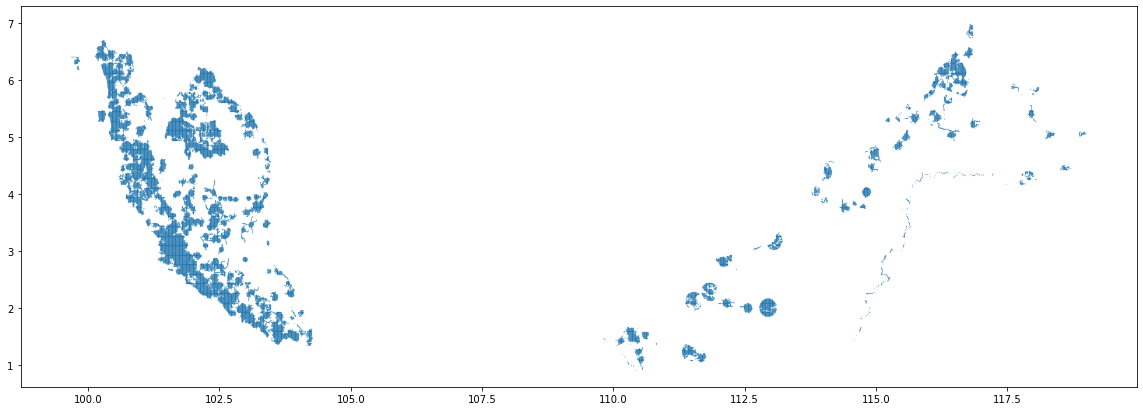

In [64]:
%matplotlib inline
plt.figure(figsize=(20,7))
plt.scatter(post_vals['xcoord'], post_vals['ycoord'], s=0.01)
plt.show()

In [3]:
ori_df = pd.read_excel("E:/Coding/Jupyter codes/KPMG TESTING/msia_coords.xlsx")
ori_df.to_numpy()

array([[100.1958333 ,   6.72083333],
       [100.2041667 ,   6.72083333],
       [100.2125    ,   6.72083333],
       ...,
       [117.8208333 ,   4.17083333],
       [117.8291667 ,   4.17083333],
       [117.8375    ,   4.17083333]])

In [4]:
len(ori_df)

375368

# Ignore this part

In [22]:
msia_1 = read_list("E:/climate_riks_kpmg/msia_coords_1")
msia_2 = read_list("E:/climate_riks_kpmg/msia_coords_2")
for i, v in enumerate(msia_2):
    print(i, v)

0 None
1 None
2 None
3 None
4 None
5 None
6 None
7 None
8 None
9 None
10 None
11 None
12 None
13 None
14 None
15 None
16 None
17 None
18 None
19 None
20 None
21 None
22 None
23 None
24 None
25 None
26 None
27 None
28 None
29 None
30 None
31 None
32 16210
33 16210
34 16210
35 16210
36 16210
37 16210
38 16210
39 16210
40 16250
41 16250
42 16250
43 16250
44 16250
45 16250
46 15000
47 15586
48 15300
49 15400
50 15200
51 15200
52 16100
53 16100
54 16100
55 16100
56 16100
57 16020
58 16020
59 16020
60 16020
61 16020
62 None
63 89200
64 89200
65 89200
66 89200
67 89200
68 89200
69 89200
70 89200
71 89257
72 89257
73 89257
74 89257
75 89257
76 89257
77 89257
78 89257
79 06250
80 06250
81 06250
82 06250
83 06250
84 06250
85 05150
86 05050
87 05050
88 05676
89 05672
90 05450
91 05450
92 05300
93 05300
94 05300
95 06500
96 06500
97 06500
98 06500
99 06500
100 06500
101 06500
102 06400
103 06400
104 06400
105 06400
106 06400
107 06400
108 06400
109 06400
110 06400
111 06350
112 06350
113 06350
114

1145 15150
1146 15150
1147 16150
1148 16150
1149 16150
1150 16150
1151 16150
1152 16150
1153 16150
1154 16150
1155 16150
1156 16150
1157 16050
1158 16050
1159 16050
1160 16300
1161 16050
1162 16300
1163 16300
1164 88999
1165 88846
1166 88999
1167 None
1168 None
1169 None
1170 None
1171 None
1172 None
1173 None
1174 None
1175 None
1176 89257
1177 None
1178 None
1179 None
1180 None
1181 89257
1182 None
1183 None
1184 05400
1185 06650
1186 06650
1187 05400
1188 05400
1189 05400
1190 05400
1191 05400
1192 06650
1193 06650
1194 06650
1195 None
1196 None
1197 06500
1198 06700
1199 06700
1200 06700
1201 06700
1202 06700
1203 06700
1204 06700
1205 06700
1206 None
1207 06750
1208 06750
1209 06750
1210 06750
1211 06750
1212 06750
1213 06750
1214 06750
1215 06750
1216 06750
1217 06750
1218 06750
1219 06750
1220 06750
1221 None
1222 None
1223 None
1224 None
1225 06300
1226 06300
1227 06300
1228 None
1229 None
1230 08210
1231 08210
1232 08210
1233 08210
1234 08210
1235 None
1236 None
1237 None
1238

2255 None
2256 None
2257 None
2258 None
2259 None
2260 17200
2261 17200
2262 17200
2263 17200
2264 17200
2265 17200
2266 17200
2267 17070
2268 17070
2269 17070
2270 17070
2271 17070
2272 17070
2273 17000
2274 17000
2275 17000
2276 17000
2277 17000
2278 17000
2279 17000
2280 None
2281 15100
2282 16010
2283 16010
2284 16010
2285 16010
2286 16010
2287 16010
2288 16010
2289 16010
2290 16400
2291 16400
2292 16400
2293 16400
2294 16400
2295 16400
2296 16370
2297 16370
2298 16370
2299 16370
2300 16370
2301 16370
2302 16370
2303 16300
2304 16300
2305 16310
2306 16310
2307 16310
2308 88813
2309 88450
2310 88450
2311 88450
2312 88450
2313 88450
2314 88822
2315 88450
2316 None
2317 None
2318 None
2319 None
2320 88999
2321 None
2322 None
2323 None
2324 88822
2325 88822
2326 None
2327 None
2328 None
2329 None
2330 06800
2331 06800
2332 06800
2333 06800
2334 06800
2335 06800
2336 06800
2337 08400
2338 08400
2339 08400
2340 08400
2341 06700
2342 06700
2343 06700
2344 06700
2345 06700
2346 06700
2347 

3397 None
3398 None
3399 None
3400 None
3401 08210
3402 None
3403 None
3404 None
3405 None
3406 None
3407 None
3408 None
3409 None
3410 None
3411 None
3412 None
3413 None
3414 None
3415 None
3416 None
3417 None
3418 None
3419 None
3420 None
3421 None
3422 None
3423 None
3424 None
3425 None
3426 None
3427 None
3428 None
3429 None
3430 None
3431 None
3432 None
3433 None
3434 None
3435 None
3436 None
3437 None
3438 None
3439 None
3440 None
3441 None
3442 None
3443 None
3444 None
3445 None
3446 None
3447 None
3448 17510
3449 None
3450 None
3451 None
3452 None
3453 None
3454 None
3455 None
3456 None
3457 None
3458 None
3459 None
3460 None
3461 None
3462 None
3463 None
3464 17070
3465 None
3466 None
3467 None
3468 17070
3469 None
3470 None
3471 None
3472 None
3473 None
3474 None
3475 None
3476 None
3477 None
3478 16450
3479 16450
3480 16450
3481 16450
3482 16450
3483 16450
3484 16450
3485 16450
3486 16450
3487 16450
3488 16450
3489 16400
3490 16810
3491 16810
3492 16810
3493 16810
3494 16810

4552 None
4553 None
4554 88220
4555 88220
4556 89507
4557 89507
4558 89507
4559 89507
4560 89507
4561 89507
4562 89507
4563 89507
4564 None
4565 88822
4566 88822
4567 None
4568 None
4569 None
4570 None
4571 None
4572 None
4573 None
4574 None
4575 None
4576 88822
4577 88822
4578 88822
4579 88822
4580 88822
4581 88822
4582 88822
4583 88822
4584 06910
4585 06910
4586 06910
4587 06910
4588 06910
4589 06910
4590 06910
4591 06910
4592 08800
4593 08800
4594 08800
4595 08800
4596 08800
4597 08800
4598 08800
4599 08800
4600 None
4601 None
4602 None
4603 None
4604 None
4605 None
4606 None
4607 None
4608 None
4609 None
4610 None
4611 None
4612 None
4613 None
4614 None
4615 None
4616 None
4617 None
4618 None
4619 None
4620 None
4621 None
4622 None
4623 None
4624 None
4625 None
4626 None
4627 None
4628 None
4629 None
4630 None
4631 None
4632 None
4633 None
4634 None
4635 None
4636 None
4637 None
4638 None
4639 None
4640 None
4641 None
4642 None
4643 None
4644 None
4645 None
4646 None
4647 None
4648

5677 17510
5678 17510
5679 None
5680 None
5681 None
5682 None
5683 None
5684 None
5685 None
5686 None
5687 None
5688 None
5689 None
5690 None
5691 None
5692 None
5693 None
5694 None
5695 None
5696 None
5697 None
5698 None
5699 None
5700 None
5701 None
5702 None
5703 None
5704 None
5705 None
5706 None
5707 16810
5708 None
5709 None
5710 None
5711 None
5712 None
5713 16800
5714 None
5715 16800
5716 16800
5717 16800
5718 16800
5719 16800
5720 16800
5721 16800
5722 16800
5723 16800
5724 16800
5725 16800
5726 16800
5727 16700
5728 16700
5729 16700
5730 16700
5731 None
5732 None
5733 None
5734 None
5735 None
5736 None
5737 None
5738 None
5739 None
5740 None
5741 None
5742 None
5743 None
5744 None
5745 None
5746 None
5747 None
5748 None
5749 None
5750 None
5751 None
5752 None
5753 None
5754 None
5755 None
5756 None
5757 06900
5758 06900
5759 06900
5760 06900
5761 06900
5762 08800
5763 08800
5764 08800
5765 08800
5766 08800
5767 08800
5768 08800
5769 08800
5770 08800
5771 08300
5772 08800
5773

6803 None
6804 None
6805 None
6806 None
6807 None
6808 None
6809 None
6810 None
6811 16800
6812 16800
6813 16800
6814 16800
6815 16800
6816 16800
6817 16800
6818 16800
6819 16800
6820 16800
6821 16800
6822 16800
6823 16800
6824 16700
6825 16700
6826 16700
6827 16700
6828 None
6829 16700
6830 16700
6831 16700
6832 None
6833 None
6834 None
6835 None
6836 None
6837 None
6838 89600
6839 89600
6840 89600
6841 89600
6842 89600
6843 89600
6844 89600
6845 None
6846 89600
6847 89600
6848 89600
6849 None
6850 None
6851 None
6852 None
6853 None
6854 None
6855 None
6856 None
6857 None
6858 None
6859 None
6860 None
6861 None
6862 None
6863 None
6864 None
6865 None
6866 None
6867 None
6868 None
6869 None
6870 None
6871 None
6872 None
6873 06900
6874 06900
6875 06900
6876 06900
6877 06900
6878 06900
6879 06900
6880 08800
6881 08300
6882 08300
6883 08300
6884 08300
6885 08300
6886 08300
6887 08300
6888 08300
6889 08300
6890 08300
6891 08300
6892 08300
6893 None
6894 None
6895 None
6896 None
6897 None


7928 08200
7929 08200
7930 08200
7931 None
7932 None
7933 None
7934 None
7935 None
7936 None
7937 None
7938 None
7939 None
7940 None
7941 None
7942 None
7943 None
7944 None
7945 None
7946 None
7947 None
7948 33100
7949 33100
7950 33100
7951 33100
7952 33100
7953 33100
7954 33100
7955 None
7956 None
7957 None
7958 None
7959 None
7960 None
7961 None
7962 None
7963 None
7964 None
7965 None
7966 None
7967 None
7968 None
7969 None
7970 None
7971 None
7972 None
7973 None
7974 None
7975 None
7976 None
7977 None
7978 None
7979 None
7980 None
7981 None
7982 None
7983 None
7984 None
7985 None
7986 None
7987 None
7988 None
7989 None
7990 None
7991 None
7992 None
7993 None
7994 None
7995 None
7996 None
7997 None
7998 None
7999 None
8000 None
8001 None
8002 None
8003 None
8004 None
8005 None
8006 None
8007 None
8008 None
8009 17600
8010 17600
8011 17600
8012 None
8013 17600
8014 17600
8015 17600
8016 None
8017 17600
8018 17600
8019 17600
8020 None
8021 None
8022 None
8023 None
8024 None
8025 None
8

9066 None
9067 None
9068 None
9069 None
9070 None
9071 None
9072 None
9073 None
9074 None
9075 None
9076 None
9077 None
9078 None
9079 None
9080 None
9081 None
9082 None
9083 None
9084 None
9085 None
9086 None
9087 None
9088 None
9089 None
9090 None
9091 None
9092 None
9093 None
9094 None
9095 None
9096 None
9097 None
9098 None
9099 None
9100 None
9101 None
9102 None
9103 None
9104 None
9105 None
9106 None
9107 None
9108 None
9109 None
9110 None
9111 None
9112 None
9113 None
9114 None
9115 17600
9116 17600
9117 17600
9118 None
9119 None
9120 None
9121 None
9122 None
9123 17600
9124 17600
9125 17600
9126 17600
9127 17600
9128 17600
9129 17600
9130 None
9131 17600
9132 17600
9133 17600
9134 17600
9135 17600
9136 17600
9137 17600
9138 None
9139 None
9140 None
9141 17600
9142 None
9143 None
9144 None
9145 17510
9146 17510
9147 17510
9148 17510
9149 17510
9150 17510
9151 17510
9152 17510
9153 None
9154 None
9155 None
9156 None
9157 None
9158 None
9159 None
9160 None
9161 None
9162 17510
916

10177 None
10178 None
10179 08110
10180 08110
10181 08110
10182 08110
10183 08110
10184 08110
10185 08110
10186 None
10187 None
10188 08100
10189 08100
10190 08100
10191 08100
10192 08100
10193 08100
10194 08100
10195 08100
10196 08100
10197 08100
10198 08100
10199 None
10200 None
10201 None
10202 None
10203 None
10204 None
10205 None
10206 None
10207 None
10208 None
10209 None
10210 None
10211 08010
10212 08010
10213 08010
10214 08010
10215 08010
10216 None
10217 None
10218 None
10219 None
10220 None
10221 None
10222 None
10223 None
10224 None
10225 None
10226 None
10227 None
10228 None
10229 None
10230 None
10231 None
10232 None
10233 None
10234 None
10235 None
10236 None
10237 None
10238 None
10239 None
10240 None
10241 09100
10242 09100
10243 09200
10244 09100
10245 09100
10246 09100
10247 09100
10248 09100
10249 09100
10250 33100
10251 33100
10252 33100
10253 33100
10254 33100
10255 33100
10256 33100
10257 33100
10258 33100
10259 33100
10260 33100
10261 33100
10262 33100
10263 331

11338 None
11339 None
11340 None
11341 None
11342 22020
11343 22020
11344 22020
11345 22020
11346 22020
11347 22020
11348 22020
11349 22020
11350 22020
11351 22020
11352 22020
11353 22020
11354 89608
11355 None
11356 None
11357 89608
11358 89608
11359 None
11360 None
11361 None
11362 None
11363 None
11364 None
11365 None
11366 None
11367 None
11368 None
11369 None
11370 None
11371 None
11372 None
11373 None
11374 None
11375 None
11376 None
11377 None
11378 None
11379 None
11380 None
11381 None
11382 None
11383 None
11384 None
11385 None
11386 None
11387 None
11388 None
11389 None
11390 None
11391 None
11392 None
11393 None
11394 None
11395 None
11396 None
11397 None
11398 None
11399 89650
11400 89650
11401 None
11402 None
11403 None
11404 None
11405 None
11406 None
11407 None
11408 None
11409 None
11410 None
11411 None
11412 None
11413 None
11414 08000
11415 08000
11416 08000
11417 08000
11418 08000
11419 08000
11420 08000
11421 None
11422 None
11423 08100
11424 None
11425 None
11426 N

12487 None
12488 None
12489 None
12490 None
12491 None
12492 17600
12493 17600
12494 None
12495 None
12496 None
12497 None
12498 None
12499 None
12500 17600
12501 17600
12502 17600
12503 None
12504 None
12505 None
12506 None
12507 None
12508 None
12509 None
12510 None
12511 None
12512 17600
12513 17600
12514 None
12515 None
12516 None
12517 None
12518 None
12519 None
12520 None
12521 None
12522 17600
12523 17600
12524 17600
12525 17600
12526 17600
12527 17600
12528 17600
12529 17510
12530 17510
12531 17510
12532 None
12533 None
12534 None
12535 None
12536 None
12537 17510
12538 17510
12539 17510
12540 17510
12541 17510
12542 17510
12543 17510
12544 None
12545 None
12546 None
12547 None
12548 18500
12549 18500
12550 18500
12551 None
12552 None
12553 18500
12554 18500
12555 18500
12556 18500
12557 None
12558 None
12559 None
12560 None
12561 None
12562 None
12563 None
12564 None
12565 None
12566 None
12567 None
12568 None
12569 None
12570 None
12571 None
12572 None
12573 None
12574 None
1

13625 22110
13626 22110
13627 22110
13628 22110
13629 22120
13630 22120
13631 None
13632 None
13633 None
13634 None
13635 None
13636 None
13637 None
13638 None
13639 None
13640 None
13641 None
13642 None
13643 None
13644 None
13645 None
13646 None
13647 None
13648 None
13649 None
13650 None
13651 None
13652 None
13653 None
13654 None
13655 None
13656 None
13657 None
13658 None
13659 None
13660 None
13661 None
13662 None
13663 None
13664 None
13665 None
13666 None
13667 None
13668 None
13669 None
13670 None
13671 None
13672 None
13673 None
13674 None
13675 None
13676 None
13677 None
13678 None
13679 None
13680 None
13681 None
13682 None
13683 None
13684 08600
13685 08600
13686 08600
13687 08600
13688 08600
13689 08600
13690 08600
13691 08600
13692 08000
13693 08000
13694 08000
13695 08000
13696 08000
13697 08000
13698 08000
13699 08000
13700 08000
13701 08000
13702 08000
13703 08000
13704 None
13705 None
13706 None
13707 None
13708 None
13709 None
13710 None
13711 None
13712 None
13713 

14783 None
14784 None
14785 None
14786 None
14787 None
14788 None
14789 None
14790 None
14791 None
14792 None
14793 None
14794 None
14795 None
14796 None
14797 None
14798 None
14799 None
14800 None
14801 None
14802 None
14803 None
14804 None
14805 None
14806 None
14807 None
14808 None
14809 None
14810 None
14811 None
14812 None
14813 None
14814 None
14815 None
14816 None
14817 None
14818 None
14819 None
14820 None
14821 None
14822 None
14823 None
14824 None
14825 None
14826 None
14827 None
14828 None
14829 None
14830 None
14831 None
14832 None
14833 None
14834 None
14835 None
14836 None
14837 None
14838 None
14839 None
14840 None
14841 None
14842 None
14843 None
14844 None
14845 None
14846 None
14847 None
14848 None
14849 17600
14850 17600
14851 17600
14852 17600
14853 17600
14854 17600
14855 None
14856 None
14857 17600
14858 17600
14859 17600
14860 17600
14861 17600
14862 17600
14863 17600
14864 17600
14865 17600
14866 17600
14867 17600
14868 17600
14869 17600
14870 None
14871 None
14

15947 None
15948 None
15949 None
15950 None
15951 None
15952 None
15953 None
15954 None
15955 None
15956 None
15957 None
15958 None
15959 None
15960 None
15961 None
15962 None
15963 None
15964 None
15965 None
15966 None
15967 None
15968 None
15969 None
15970 None
15971 None
15972 None
15973 None
15974 None
15975 None
15976 None
15977 None
15978 None
15979 None
15980 None
15981 None
15982 None
15983 None
15984 None
15985 None
15986 None
15987 None
15988 None
15989 None
15990 None
15991 None
15992 None
15993 None
15994 None
15995 None
15996 None
15997 None
15998 None
15999 None
16000 None
16001 None
16002 None
16003 None
16004 None
16005 None
16006 None
16007 22100
16008 22100
16009 None
16010 None
16011 None
16012 22100
16013 22100
16014 22100
16015 None
16016 None
16017 21010
16018 21010
16019 21010
16020 21010
16021 21010
16022 21010
16023 21010
16024 None
16025 None
16026 89740
16027 None
16028 None
16029 None
16030 None
16031 None
16032 None
16033 None
16034 None
16035 None
16036 No

17084 None
17085 None
17086 None
17087 None
17088 None
17089 None
17090 None
17091 None
17092 21010
17093 89740
17094 89740
17095 89740
17096 None
17097 None
17098 None
17099 None
17100 None
17101 None
17102 None
17103 None
17104 None
17105 None
17106 None
17107 None
17108 None
17109 None
17110 None
17111 None
17112 None
17113 None
17114 None
17115 None
17116 None
17117 None
17118 None
17119 None
17120 None
17121 None
17122 None
17123 None
17124 None
17125 None
17126 None
17127 None
17128 None
17129 None
17130 None
17131 None
17132 None
17133 None
17134 None
17135 None
17136 None
17137 None
17138 None
17139 None
17140 None
17141 None
17142 None
17143 None
17144 None
17145 None
17146 None
17147 None
17148 None
17149 None
17150 None
17151 None
17152 None
17153 89650
17154 None
17155 None
17156 None
17157 13100
17158 13100
17159 13100
17160 13100
17161 13200
17162 13200
17163 13200
17164 13200
17165 13200
17166 13200
17167 13200
17168 13200
17169 13200
17170 13200
17171 13300
17172 13300


18280 13300
18281 13300
18282 13300
18283 13300
18284 13300
18285 13300
18286 13300
18287 09400
18288 09400
18289 09400
18290 09400
18291 09400
18292 09400
18293 09400
18294 09400
18295 09400
18296 09400
18297 None
18298 None
18299 None
18300 None
18301 09400
18302 None
18303 None
18304 None
18305 None
18306 None
18307 None
18308 None
18309 None
18310 None
18311 None
18312 None
18313 None
18314 None
18315 None
18316 None
18317 None
18318 None
18319 None
18320 None
18321 None
18322 None
18323 None
18324 None
18325 None
18326 None
18327 None
18328 None
18329 None
18330 None
18331 None
18332 None
18333 None
18334 None
18335 None
18336 None
18337 None
18338 None
18339 None
18340 None
18341 None
18342 None
18343 None
18344 None
18345 None
18346 None
18347 None
18348 None
18349 None
18350 None
18351 None
18352 None
18353 None
18354 33310
18355 33320
18356 33320
18357 33320
18358 33320
18359 33320
18360 33320
18361 33320
18362 33320
18363 33320
18364 33320
18365 33320
18366 33320
18367 None
1

19324 None
19325 None
19326 None
19327 None
19328 None
19329 None
19330 None
19331 None
19332 None
19333 None
19334 None
19335 None
19336 None
19337 None
19338 None
19339 None
19340 None
19341 None
19342 None
19343 None
19344 None
19345 None
19346 None
19347 None
19348 None
19349 None
19350 None
19351 None
19352 None
19353 None
19354 None
19355 None
19356 None
19357 None
19358 None
19359 None
19360 None
19361 None
19362 None
19363 None
19364 None
19365 None
19366 None
19367 None
19368 None
19369 None
19370 None
19371 None
19372 None
19373 None
19374 None
19375 None
19376 None
19377 None
19378 None
19379 None
19380 None
19381 None
19382 None
19383 None
19384 None
19385 None
19386 None
19387 None
19388 None
19389 None
19390 None
19391 None
19392 None
19393 None
19394 None
19395 None
19396 None
19397 None
19398 None
19399 None
19400 None
19401 None
19402 None
19403 None
19404 None
19405 None
19406 None
19407 None
19408 None
19409 None
19410 None
19411 None
19412 None
19413 None
19414 None

In [9]:
msia_3 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_3.txt", sep=" ", header=None).to_numpy()
msia_4 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_4.txt", sep=" ", header=None).to_numpy()
msia_5 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_5.txt", sep=" ", header=None).to_numpy()
msia_6 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_6.txt", sep=" ", header=None).to_numpy()
msia_7 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_7.txt", sep=" ", header=None).to_numpy()
msia_8 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_8.txt", sep=" ", header=None).to_numpy()
msia_9 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_9.txt", sep=" ", header=None).to_numpy()
msia_10 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_10.txt", sep=" ", header=None).to_numpy()
msia_11 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_11.txt", sep=" ", header=None).to_numpy()
msia_12 = pd.read_csv("E:/climate_riks_kpmg/msia_coords_12.txt", sep=" ", header=None).to_numpy()

In [10]:
len(msia_1), len(msia_2), len(msia_3), len(msia_4), len(msia_5), len(msia_6), len(msia_7), len(msia_8), len(msia_9), len(msia_10), len(msia_11), len(msia_12)

(5000, 20000, 96558, 62725, 36680, 7705, 36046, 11628, 15593, 15335, 225, 1154)

In [11]:
index_list = [len(msia_1), len(msia_2), len(msia_3), len(msia_4), len(msia_5), len(msia_6), len(msia_7), len(msia_8), len(msia_9), len(msia_10), len(msia_11), len(msia_12)]
index_list

[5000, 20000, 96558, 62725, 36680, 7705, 36046, 11628, 15593, 15335, 225, 1154]

In [14]:
count = 0
for i in index_list:
    count += i
    print(count)
print(len(ori_df))

5000
25000
121558
184283
220963
228668
264714
276342
291935
307270
307495
308649
375368
